---
# OTT의 확산, 패러다음의 전환 - 사회적 배경 시각화
---

## 시각화1
### `주중/주말에 주로하는 여가활동 비율(%)`
데이터: `국민_미래인식가치관조사(2024).csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕' 지정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

df = pd.read_csv('C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\국민_미래인식가치관조사(2024).csv')
df.shape  # 표본 개수 16,897

# 설문 결과지 매핑
leisure_map = {
    1.0: '동영상 콘텐츠 시청',
    2.0: '문화 예술 관람',
    3.0: '문화 예술 활동',
    4.0: '스포츠 경기 관람',
    5.0: '스포츠 활동',
    6.0: '관광',
    7.0: '게임',
    8.0: 'SNS',
    9.0: '자기 개발 활동',
    10.0: '휴식',
    11.0: '사회 활동',
    12.0: '기타'
}

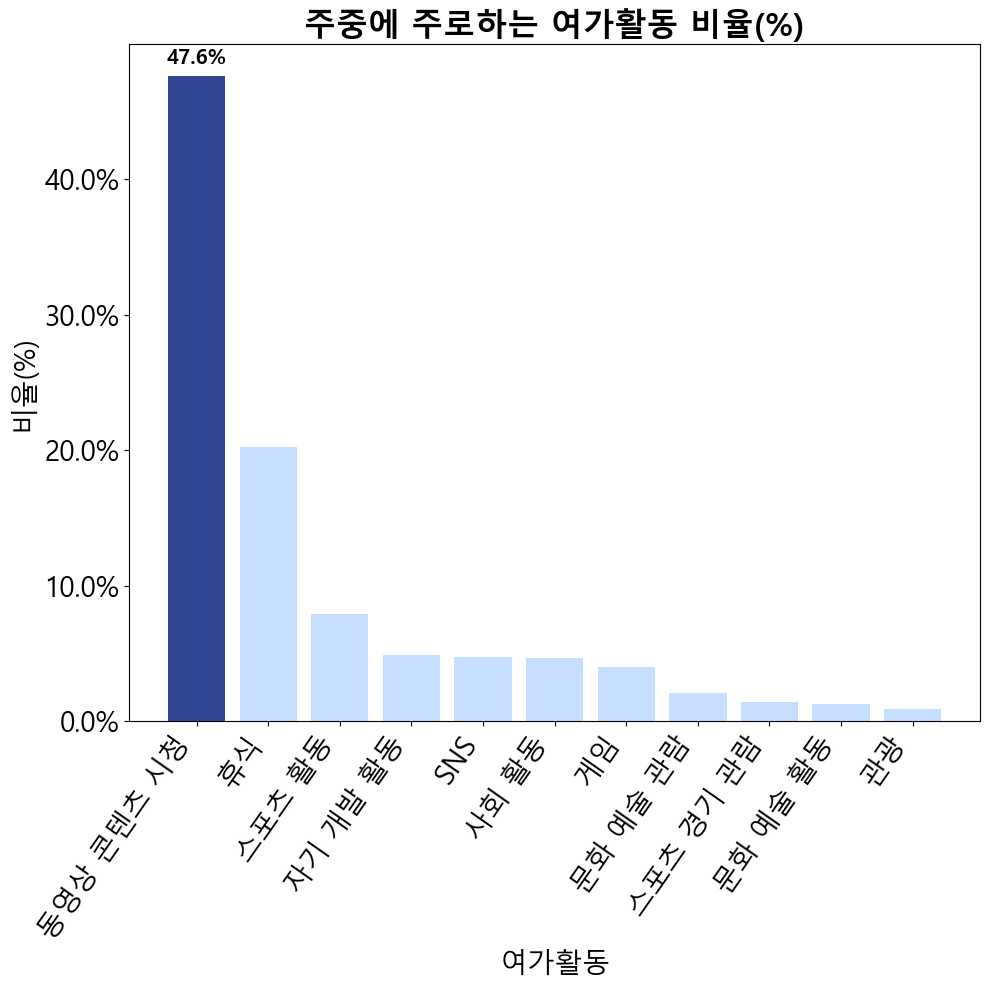

In [7]:
##### 주중 여가활동 1순위 #####
weekday_leisure = df['E1_1_1'].map(leisure_map)

# 비율 계산
total = 16897
counts = weekday_leisure.value_counts().sort_index()
proportion = counts / total * 100
# 기타 항목 제외
proportion = proportion.drop('기타')
# 비율 기준 내림차순 정렬
proportion = proportion.sort_values(ascending=False)

# 막대 그래프 시각화
highlight_label = proportion.idxmax()
colors = ['#314692' if label == highlight_label else '#c6deff' for label in proportion.index]
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.bar(proportion.index, proportion.values, color=colors)
ax.set_xlabel('여가활동', fontsize=20)
ax.set_ylabel('비율(%)', fontsize=20)
ax.set_title('주중에 주로하는 여가활동 비율(%)', fontsize=23, fontweight='bold')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}%'))
plt.xticks(rotation=55, ha='right', fontsize=20)
plt.yticks(fontsize=20)

# 비율이 가장 높은 막대에만 수치 표시
for bar, label in zip(bars, proportion.index):
    if label == highlight_label:
        ax.annotate(f'{bar.get_height():.1f}%', 
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 5),  # 5픽셀 위로
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

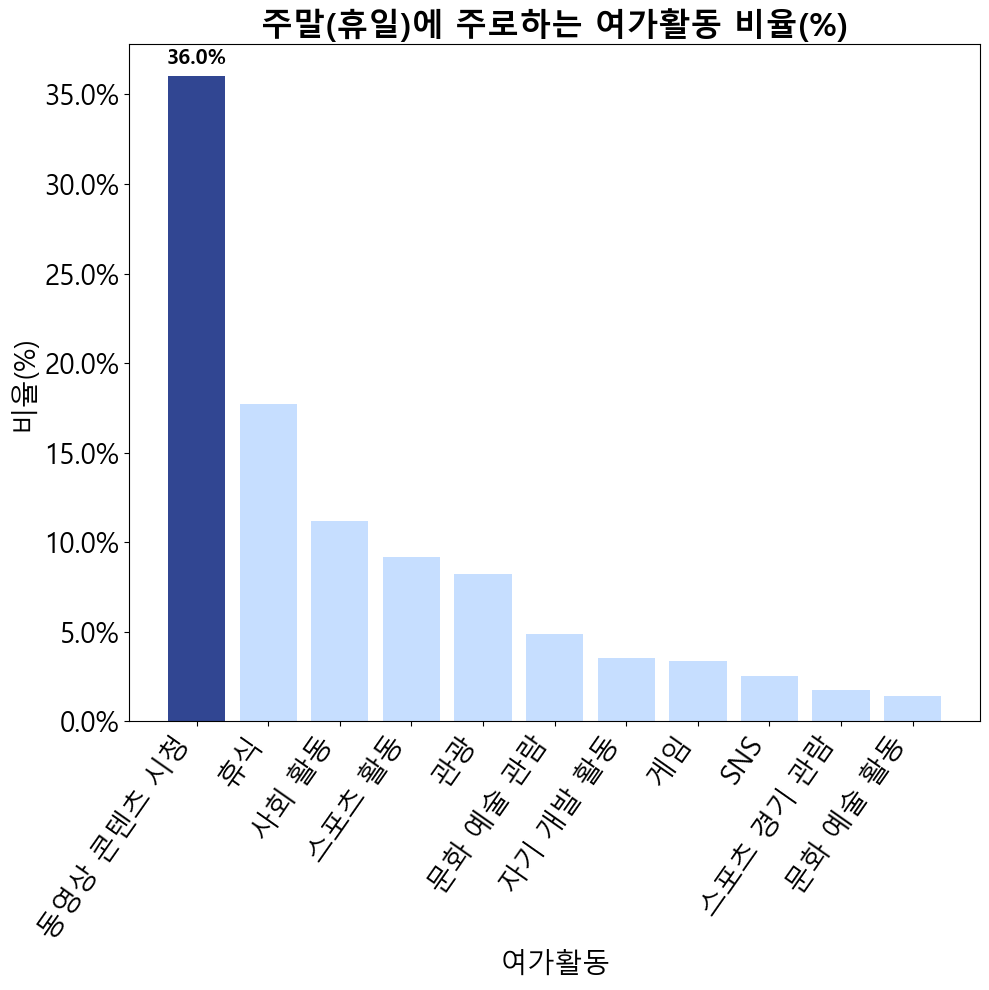

In [5]:
##### 주말 여가활동 1순위 #####
weekend_leisure = df['E1_2_1'].map(leisure_map)

# 비율 계산
total = 16897
counts = weekend_leisure.value_counts().sort_index()
proportion = counts / total * 100
# 기타 항목 제외
proportion = proportion.drop('기타')
# 비율 기준 내림차순 정렬
proportion = proportion.sort_values(ascending=False)

# 막대 그래프 시각화
highlight_label = proportion.idxmax()
colors = ['#314692' if label == highlight_label else '#c6deff' for label in proportion.index]
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.bar(proportion.index, proportion.values, color=colors)
ax.set_xlabel('여가활동', fontsize=20)
ax.set_ylabel('비율(%)', fontsize=20)
ax.set_title('주말(휴일)에 주로하는 여가활동 비율(%)', fontsize=23, fontweight='bold')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}%'))
plt.xticks(rotation=55, ha='right', fontsize=20)
plt.yticks(fontsize=20)

# 비율이 가장 높은 막대에만 수치 표시
for bar, label in zip(bars, proportion.index):
    if label == highlight_label:
        ax.annotate(f'{bar.get_height():.1f}%', 
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 5),  # 5픽셀 위로
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 시각화2
### `연도별 OTT 이용률 (성별/연령대별)`
데이터: `유료로_이용_중인_온라인동영상서비스_OTT_중복응답_인구통계학.csv`

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕' 지정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

df = pd.read_csv("C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\유료로_이용_중인_온라인동영상서비스_OTT_중복응답_인구통계학.csv", encoding='cp949', index_col=0, header=None)

# 확인할 서비스명 리스트
target_services = [
    '넷플릭스 (%)',
    '티빙(Tving) (%)',
    '유튜브(유튜브 프리미엄 구독) (%)'
]

# 원하는 서비스명만 남은 컬럼 리스트 추출
platform_row = df.loc['플랫폼']
filtered_cols = [col for col in df.columns if platform_row[col] in target_services]

year_row = df.loc['연도']
years = year_row[filtered_cols]
yearly_sum = {}

# 연도별로 서비스 이용률 합산
for year in years.unique():
    cols_in_year = [col for col in filtered_cols if year_row[col] == year]
    # 남자, 여자, 10대~70세 이상 행만 추출
    demo_rows = ['남자', '여자', '10대', '20대', '30대', '40대', '50대', '60대', '70세 이상']
    # 합산
    yearly_sum[year] = df.loc[demo_rows, cols_in_year].astype(float).sum(axis=1)
    
result_df = pd.DataFrame(yearly_sum)

# 연도 오름차순 정렬
result_df = result_df[sorted(result_df.columns, key=int)]

<Figure size 1000x600 with 0 Axes>

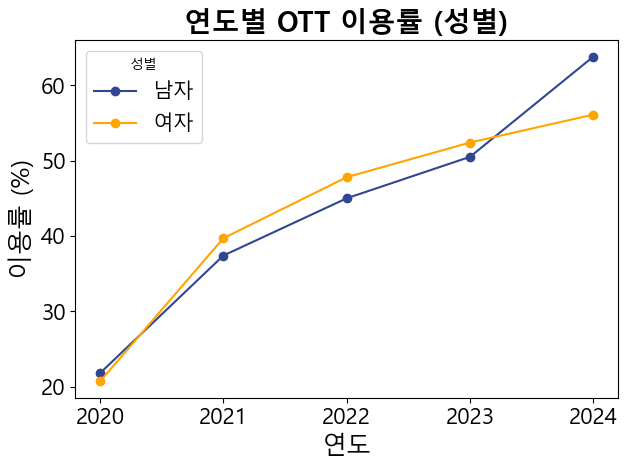

In [11]:
### 성별 그래프
gender_df = result_df.T[['남자', '여자']]
plt.figure(figsize=(10, 6))
gender_df.plot(marker='o', color=['#314692', '#FFA500'])
plt.title('연도별 OTT 이용률 (성별)', fontsize=20, fontweight='bold')
plt.xlabel('연도', fontsize=18)
plt.ylabel('이용률 (%)', fontsize=18)
plt.xticks(range(len(gender_df.index)), gender_df.index, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='성별', fontsize=15)

# # 각 점 위에 수치 표시
# for i, line in enumerate(ax.get_lines()):
#     for x, y in zip(line.get_xdata(), line.get_ydata()):
#         ax.text(x, y, f'{y:.1f}', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

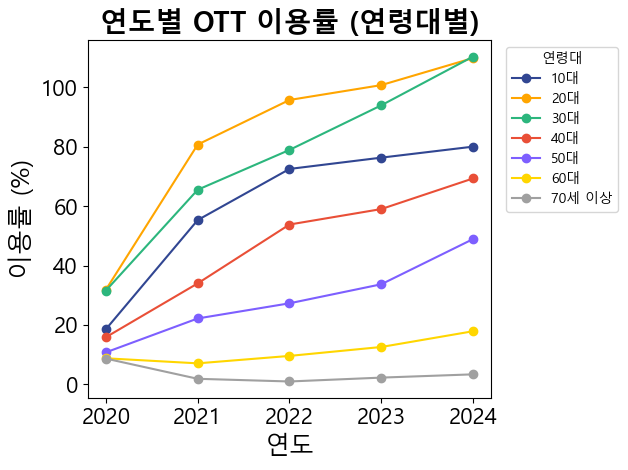

In [12]:
### 연령대별 그래프
age_df = result_df.T[['10대', '20대', '30대', '40대', '50대', '60대', '70세 이상']]
plt.figure(figsize=(10, 6))
age_df.plot(marker='o', color=['#314692', '#FFA500', '#2CB67D', '#E94F37', '#7D5FFF', '#FFD600', '#A0A0A0'])
plt.title('연도별 OTT 이용률 (연령대별)', fontsize=20, fontweight='bold')
plt.xlabel('연도', fontsize=18)
plt.ylabel('이용률 (%)', fontsize=18)
plt.xticks(range(len(age_df.index)), age_df.index, fontsize=16)
plt.yticks(fontsize=16)

plt.legend(title='연령대', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()